# Imports sous Notebook Python
Dans ce TP, vous allez essentiellement programmer des classes dans un fichier que vous pourrez garder pour plus tard. Ces classes seront enregistrées dans des fichiers `Optim.py`  et `functions.py`. Cependant, le comportement par défaut d'un Notebook quand on demande d'importer un fichier est de ne pas le relire !!! Ainsi vos modifications dans les fichiers ne seront pas prises en compte. Pour que ce soit le cas, il faut lancer les commandes suivantes :

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Fonctionnement des classes et des fichiers de librairie sous python
Dans cette section, nous allons nous chauffer un peu et apprendre (si on ne le sait pas déjà) comment fonctionnent les classes et les fichiers sous python. Le fichier `Optim.py` est vide mais le fichier `functions.py` contient déjà une classe nommée `square`. Ouvrez le fichier `function.py`. Cette classe `square` a 4 sous-fonctions, la fonction `__init__` se lance à l'appel de la classe (instanciation) et les autres fonctions se lancent avec les commandes suivantes

In [2]:
import functions as func
print("***** INSTANCIATION")
J=func.square()
print("***** AUTRES FONCTIONS")
a=np.array([1,2])
print(J.value(a))
print(J.grad(a))
print(J.Hess(a))

***** INSTANCIATION
Fonction (x,y) --> x^2/2+7/2*y^2
***** AUTRES FONCTIONS
14.5
[ 1 14]
[[1. 0.]
 [0. 7.]]


# Implémentation de nouvelles fonctions


> **TODO** : Dans le fichier `functions.py`, créez une classe nommée `Rosen()` sur le modèle de `square()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ f:(x,y)\mapsto 100*(y-x^2)^2 +(1-x)^2$$
Créez aussi une fonction `oscill()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ g:(x,y)\mapsto \frac 1 2 x^2 +x\cos(y)$$


In [3]:
import functions as func

R=func.Rosen()
O=func.oscill()
a=np.array([1.3,2.45])
print(R.value(a)) # 57.85
print(O.value(a)) # -0.15630063026149965
print(R.grad(a))
print(R.Hess(a))
print(O.grad(a))
print(O.Hess(a))


Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
Fonction (x,y) --> 1/2*x^2+x*cos(y)
57.85
-0.15630063026149965
[-394.6  152. ]
[[1050. -520.]
 [-520.  200.]]
[ 0.52976875 -0.82909411]
[[ 1.         -0.6377647 ]
 [-0.6377647   1.00130063]]


# Tests de dérivées numériques
Volontairement, je ne vous ai pas donné les réponses pour le gradient et la Hessienne. Avant de continuer, il faut vérifier que vos calculs sont bons. Pour cela on va faire des tests avec le gradient et la dérivée numérique. Pour ce faire on va partir d'un point $a$ quelconque et on prend une direction $d$ aléatoire. On compare ensuite pour plusieurs valeurs de $\varepsilon$ entre 1.e-8 et 1.e-1 les valeurs suivantes :
$$\frac{J(a+\varepsilon d) -J(a)}{\varepsilon} \simeq (\nabla J(a),d)$$
$$\frac{\nabla J(a+\varepsilon d) -\nabla J(a))}{\varepsilon} \simeq HJ(a)d$$
On rappelle que quand on compare deux nombres $b$ et $c$, on s'intéresse au nombre $b/c$. Quand on compare deux vecteurs $b$ et $c$, on s'intéresse au ratio des normes et à l'angle donné par 
$$\frac{(b,c)}{\Vert b \Vert \Vert c\Vert}$$
Créez une fonction `deriv_num(J,a,d,compute_grad=True,compute_Hess=True)` dans `Optim.py` qui teste la dérivée numérique d'une fonction `J`. Les arguments `compute_grad` et `compute_Hess` sont optionnels et déterminent si on doit vérifier le calcul de `J` pour son gradient et sa Hessienne. Ensuite testez votre code pour les 3 fonctions.

In [4]:
import Optim as opt
np.random.seed(42)
a=np.random.randn(2)
d=np.random.randn(2)
opt.deriv_num(func.square(),a,d)
opt.deriv_num(func.Rosen(),a,d)
opt.deriv_num(func.oscill(),a,d)

Fonction (x,y) --> x^2/2+7/2*y^2
eps 1.000e-01 grad 7.2e-01 ratio 0.0e+00 angle 0.0e+00
eps 1.000e-02 grad 7.2e-02 ratio 2.2e-16 angle 0.0e+00
eps 1.000e-03 grad 7.2e-03 ratio 1.5e-14 angle -1.1e-16
eps 1.000e-04 grad 7.2e-04 ratio 1.4e-13 angle 0.0e+00
eps 1.000e-05 grad 7.2e-05 ratio 5.9e-14 angle 0.0e+00
eps 1.000e-06 grad 7.2e-06 ratio 1.2e-12 angle 0.0e+00
eps 1.000e-07 grad 7.2e-07 ratio 7.3e-11 angle -1.1e-16
eps 1.000e-08 grad 7.0e-08 ratio 8.9e-10 angle -1.1e-16
eps 1.000e-09 grad 1.9e-09 ratio 1.3e-08 angle 0.0e+00
eps 1.000e-10 grad 4.6e-08 ratio 3.8e-08 angle 0.0e+00
eps 1.000e-11 grad 1.6e-06 ratio 3.6e-07 angle -3.2e-15
eps 1.000e-12 grad 6.5e-06 ratio 3.9e-06 angle -7.5e-13
Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
eps 1.000e-01 grad 1.5e-01 ratio 1.0e-02 angle -3.4e-03
eps 1.000e-02 grad 1.6e-02 ratio 1.1e-03 angle -3.7e-05
eps 1.000e-03 grad 1.6e-03 ratio 1.1e-04 angle -3.8e-07
eps 1.000e-04 grad 1.6e-04 ratio 1.1e-05 angle -3.8e-09
eps 1.000e-05 grad 1.6e-05 ratio 1.1e

## Méthode de gradient à pas fixe
Nous allons implémenter une méthode de gradient à pas fixe, pour cela nous allons lancer la fonction `main_algorithm` dans `Optim.py`. Cette méthode vous est donnée, il n'y a rien à modifier, il faut comprendre le code et les informations suivantes. 

In [5]:
import Optim as opt
x0=np.array([7,1.5])
f=func.square()
res=opt.main_algorithm(f,0.1,x0,ls=opt.ls_constant,dc=opt.dc_gradient)

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=3.238e+01 df=1.262e+01 comp=[   2,   2,   0]
iter=   2 f=2.055e+01 df=7.044e+00 comp=[   3,   3,   0]
iter=   3 f=1.694e+01 df=7.000e+00 comp=[   4,   4,   0]
iter=   4 f=1.528e+01 df=8.107e+00 comp=[   5,   5,   0]
iter=   5 f=1.058e+01 df=5.608e+00 comp=[   6,   6,   0]
iter=   6 f=7.730e+00 df=4.043e+00 comp=[   7,   7,   0]
iter=   7 f=6.875e+00 df=4.890e+00 comp=[   8,   8,   0]
iter=   8 f=5.278e+00 df=4.117e+00 comp=[   9,   9,   0]
iter=   9 f=3.743e+00 df=2.752e+00 comp=[  10,  10,   0]
iter=  10 f=3.122e+00 df=2.901e+00 comp=[  11,  11,   0]
iter=  11 f=2.551e+00 df=2.816e+00 comp=[  12,  12,   0]
iter=  12 f=1.858e+00 df=2.034e+00 comp=[  13,  13,   0]
iter=  13 f=1.459e+00 df=1.787e+00 comp=[  14,  14,   0]
iter=  14 f=1.210e+00 df=1.840e+00 comp=[  15,  15,   0]
iter=  15 f=9.210e-01 df=1.489e+00 comp=[  16,  16,   0]
iter=  16 f=7.009e-01 df=1.186e+00 comp=[  17,  17,   0

On vous donne aussi une fonction `graphical_info` qui permet de donner des informations sur le tableau `res` de convergence

In [6]:
def contour_and_f_plot(res,function, levels=None,xmin=-2,xmax=2,ymin=-2,ymax=2):
    xiter=np.array(res['list_x'])
    fig, axarr = plt.subplots(2, 2, figsize=(16,8))
    # First plot 
    axarr[0,0].set_title('Points and levelset')
    Nx = 1000
    Ny = 1000
    x = np.linspace(xmin,xmax,Nx)
    y = np.linspace(ymin,ymax,Ny)
    X, Y = np.meshgrid(x, y)
    Z=function.value((X,Y))
    if levels:
        CS = axarr[0,0].contour(X, Y, Z, levels)
    else:
        CS = axarr[0,0].contour(X, Y, Z)
    axarr[0,0].plot(xiter[:,0], xiter[:,1],'+')
    axarr[0,0].clabel(CS, inline=1, fontsize=10)
    axarr[0,0].axis('equal')
    # Second plot
    axarr[0,1].set_title('Evolution of the cost')
    fiter=np.array(res['list_costs'])
    if min(fiter) > 0:
        axarr[0,1].semilogy(fiter)
    else:
        axarr[0,1].plot(fiter)
    #Third plot
    axarr[1,0].set_title('Norm of the gradient')
    giter=np.array(res['list_grads'])
    axarr[1,0].semilogy(giter)
    #Fourth plot
    axarr[1,1].set_title('Steps')
    siter=np.array(res['list_steps'])
    axarr[1,1].plot(siter)
    plt.show()



>**TODO** :Essayer les 3 fonctions avec plusieurs pas et affichez le nombre d'itérations nécessaires et la valeur finale de la fonction obtenue et la valeur finale du gradient, vous devez faire apparaître le fait qu'un pas trop petit ou trop grand ne fait pas converger

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=3.238e+01 df=1.262e+01 comp=[   2,   2,   0]
iter=   2 f=2.055e+01 df=7.044e+00 comp=[   3,   3,   0]
iter=   3 f=1.694e+01 df=7.000e+00 comp=[   4,   4,   0]
iter=   4 f=1.528e+01 df=8.107e+00 comp=[   5,   5,   0]
iter=   5 f=1.058e+01 df=5.608e+00 comp=[   6,   6,   0]
iter=   6 f=7.730e+00 df=4.043e+00 comp=[   7,   7,   0]
iter=   7 f=6.875e+00 df=4.890e+00 comp=[   8,   8,   0]
iter=   8 f=5.278e+00 df=4.117e+00 comp=[   9,   9,   0]
iter=   9 f=3.743e+00 df=2.752e+00 comp=[  10,  10,   0]
iter=  10 f=3.122e+00 df=2.901e+00 comp=[  11,  11,   0]
iter=  11 f=2.551e+00 df=2.816e+00 comp=[  12,  12,   0]
iter=  12 f=1.858e+00 df=2.034e+00 comp=[  13,  13,   0]
iter=  13 f=1.459e+00 df=1.787e+00 comp=[  14,  14,   0]
iter=  14 f=1.210e+00 df=1.840e+00 comp=[  15,  15,   0]
iter=  15 f=9.210e-01 df=1.489e+00 comp=[  16,  16,   0]
iter=  16 f=7.009e-01 df=1.186e+00 comp=[  17,  17,   0

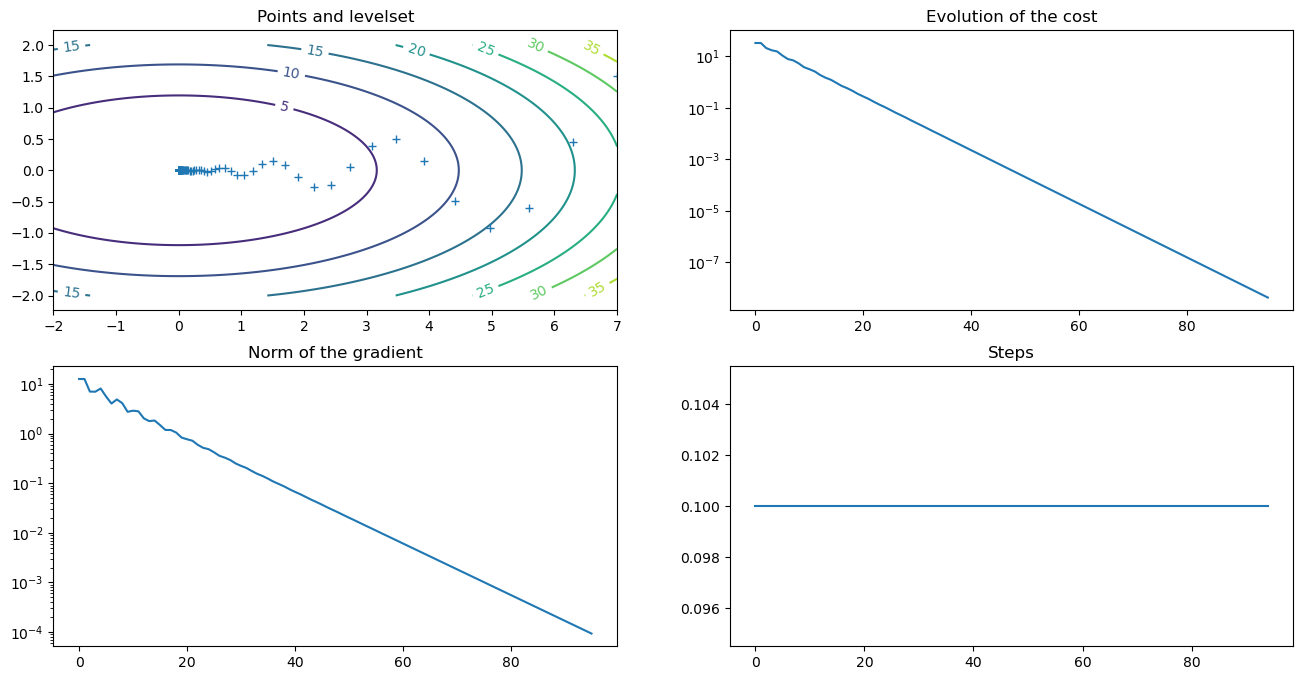

In [32]:
#square pas constant
x1=np.array([7,1.5])
f1=func.square()
res=opt.main_algorithm(f1,0.1,x1,ls=opt.ls_constant,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f1,xmax=7)

Vous pouvez garder ici quelques tests qui vous semblent intéressant sous le modèle de `TEST 1`

Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2


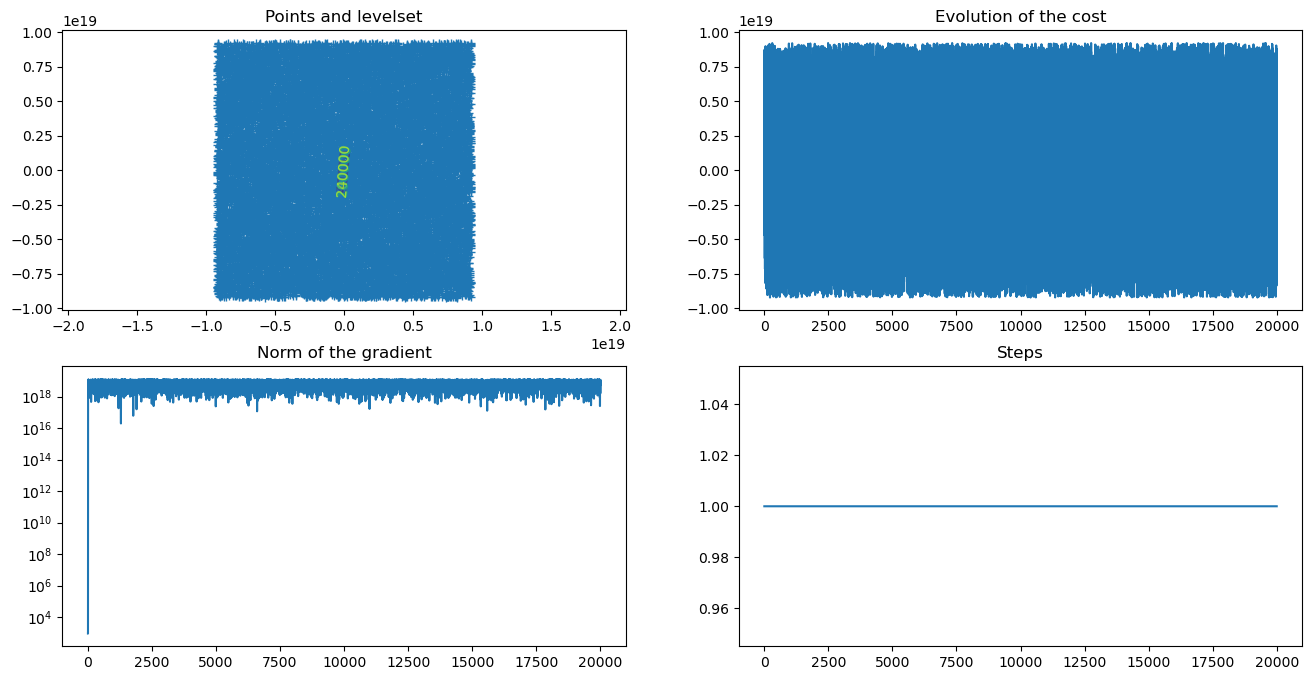

In [31]:
# Rosen pas constant
x2=np.array([-1,-1])
f2=func.Rosen()
res=opt.main_algorithm(f2,1,x2,ls=opt.ls_constant,dc=opt.dc_gradient,verbose=False)
contour_and_f_plot(res,f2,xmax=7)

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=8.385e-02 df=1.081e+00 comp=[   1,   1,   0]
iter=   1 f=8.385e-02 df=1.081e+00 comp=[   2,   2,   0]
iter=   2 f=-2.466e-02 df=9.302e-01 comp=[   3,   3,   0]
iter=   3 f=-1.167e-01 df=7.868e-01 comp=[   4,   4,   0]
iter=   4 f=-1.839e-01 df=6.757e-01 comp=[   5,   5,   0]
iter=   5 f=-2.332e-01 df=5.940e-01 comp=[   6,   6,   0]
iter=   6 f=-2.708e-01 df=5.342e-01 comp=[   7,   7,   0]
iter=   7 f=-3.009e-01 df=4.899e-01 comp=[   8,   8,   0]
iter=   8 f=-3.259e-01 df=4.557e-01 comp=[   9,   9,   0]
iter=   9 f=-3.474e-01 df=4.280e-01 comp=[  10,  10,   0]
iter=  10 f=-3.663e-01 df=4.044e-01 comp=[  11,  11,   0]
iter=  11 f=-3.831e-01 df=3.830e-01 comp=[  12,  12,   0]
iter=  12 f=-3.981e-01 df=3.628e-01 comp=[  13,  13,   0]
iter=  13 f=-4.116e-01 df=3.433e-01 comp=[  14,  14,   0]
iter=  14 f=-4.237e-01 df=3.241e-01 comp=[  15,  15,   0]
iter=  15 f=-4.345e-01 df=3.050e-01 comp=[  16,  16,   0]
iter=  16 f=-4.441e-01 df=2.861e-01 co

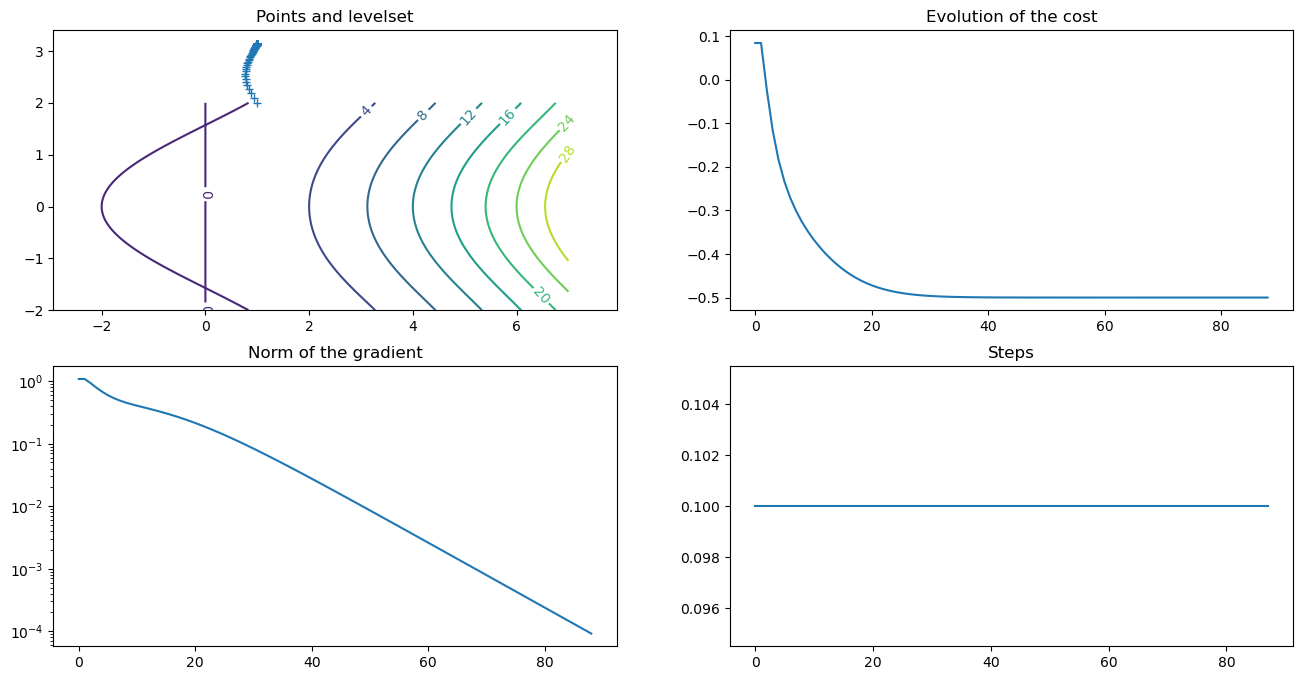

In [37]:
#oscill pac constant (1,pi) ,(-1,0)
x3=np.array([1,2])
f3=func.oscill()
res=opt.main_algorithm(f3,0.1,x3,ls=opt.ls_constant,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-4.030e-02 df=9.589e-01 comp=[   2,   2,   0]
iter=   2 f=-1.260e-01 df=8.315e-01 comp=[   3,   3,   0]
iter=   3 f=-1.994e-01 df=7.109e-01 comp=[   4,   4,   0]
iter=   4 f=-2.540e-01 df=6.168e-01 comp=[   5,   5,   0]
iter=   5 f=-2.949e-01 df=5.461e-01 comp=[   6,   6,   0]
iter=   6 f=-3.266e-01 df=4.923e-01 comp=[   7,   7,   0]
iter=   7 f=-3.521e-01 df=4.503e-01 comp=[   8,   8,   0]
iter=   8 f=-3.732e-01 df=4.160e-01 comp=[   9,   9,   0]
iter=   9 f=-3.912e-01 df=3.868e-01 comp=[  10,  10,   0]
iter=  10 f=-4.067e-01 df=3.610e-01 comp=[  11,  11,   0]
iter=  11 f=-4.202e-01 df=3.373e-01 comp=[  12,  12,   0]
iter=  12 f=-4.319e-01 df=3.150e-01 comp=[  13,  13,   0]
iter=  13 f=-4.422e-01 df=2.938e-01 comp=[  14,  14,   0]
iter=  14 f=-4.511e-01 df=2.734e-01 comp=[  15,  15,   0]
iter=  15 f=-4.589e-01 df=2.537e-01 comp=[  16,  16,   0]
iter=  16 f=-4.655e-01 df=2.348e-01 

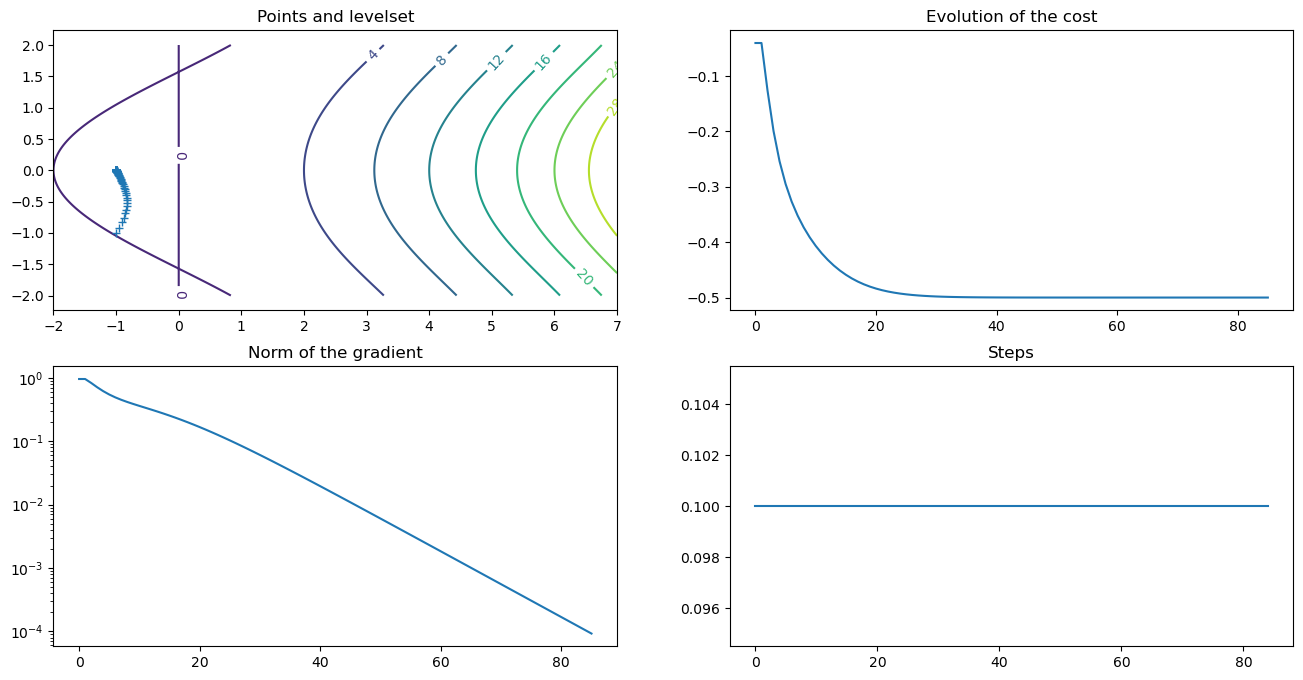

In [38]:
#oscill pac constant (1,pi) ,(-1,0)
x3=np.array([-1,-1])
f3=func.oscill()
res=opt.main_algorithm(f3,0.1,x3,ls=opt.ls_constant,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

## Line search Backtracking
Implémenter une fonction de recherche linéaire `ls_backtracking` qui calcule un pas par rebroussement, c'est à dire qui vérifie que la fonction décroît et qui divise le pas par 2 si elle ne décroît pas.
La fonction doit s'écrire sous la forme

`x2,f2,df2,step2,info = ls_backtracking(x, function, step, descent,f,df)`

Les arguments en entrée sont 
- `x` : l'itéré actuel
- `function` : qui est la fonction que l'on minimise
- `step` : qui est le pas initial de la line-search
- `descent` : la direction de descente
- `f` : la valeur de la fonction au point `x`
- `df` : la valeur du gradient de la fonction au point `x`

Les arguments en sortie sont 
- `x2` : le nouvel itéré, il vaut `x+step2*descent`
- `f2` : la valeur de la fonction au point `x2`
- `df2` : la valeur du gradient de la fonction au point `x2`
- `step2` : le pas calculé par la méthode
- `info` : une information, ici elle est inutile, on la met à `None`


Tester l’algorithme de descente de gradient avec cette recherche linéaire et observer que cette recherche linéaire est plus stable que la précédente. 
Vérifier que pour `step=1` la méthode avec `ls_constant` **diverge** pour la fonction `Rosen` mais elle **converge** avec `ls_backtracking`. Montrez que le coût supplémentaire de cette méthode est négligeable.

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=1.821e+01 df=9.465e+00 comp=[   5,   2,   0]
iter=   2 f=1.024e+01 df=7.098e+00 comp=[   7,   3,   0]
iter=   3 f=5.762e+00 df=5.324e+00 comp=[   9,   4,   0]
iter=   4 f=3.241e+00 df=3.993e+00 comp=[  11,   5,   0]
iter=   5 f=1.823e+00 df=2.995e+00 comp=[  13,   6,   0]
iter=   6 f=1.026e+00 df=2.246e+00 comp=[  15,   7,   0]
iter=   7 f=5.769e-01 df=1.684e+00 comp=[  17,   8,   0]
iter=   8 f=3.245e-01 df=1.263e+00 comp=[  19,   9,   0]
iter=   9 f=1.825e-01 df=9.475e-01 comp=[  21,  10,   0]
iter=  10 f=1.027e-01 df=7.106e-01 comp=[  23,  11,   0]
iter=  11 f=5.775e-02 df=5.330e-01 comp=[  25,  12,   0]
iter=  12 f=3.248e-02 df=3.997e-01 comp=[  27,  13,   0]
iter=  13 f=1.827e-02 df=2.998e-01 comp=[  29,  14,   0]
iter=  14 f=1.028e-02 df=2.249e-01 comp=[  31,  15,   0]
iter=  15 f=5.782e-03 df=1.686e-01 comp=[  33,  16,   0]
iter=  16 f=3.252e-03 df=1.265e-01 comp=[  35,  17,   0

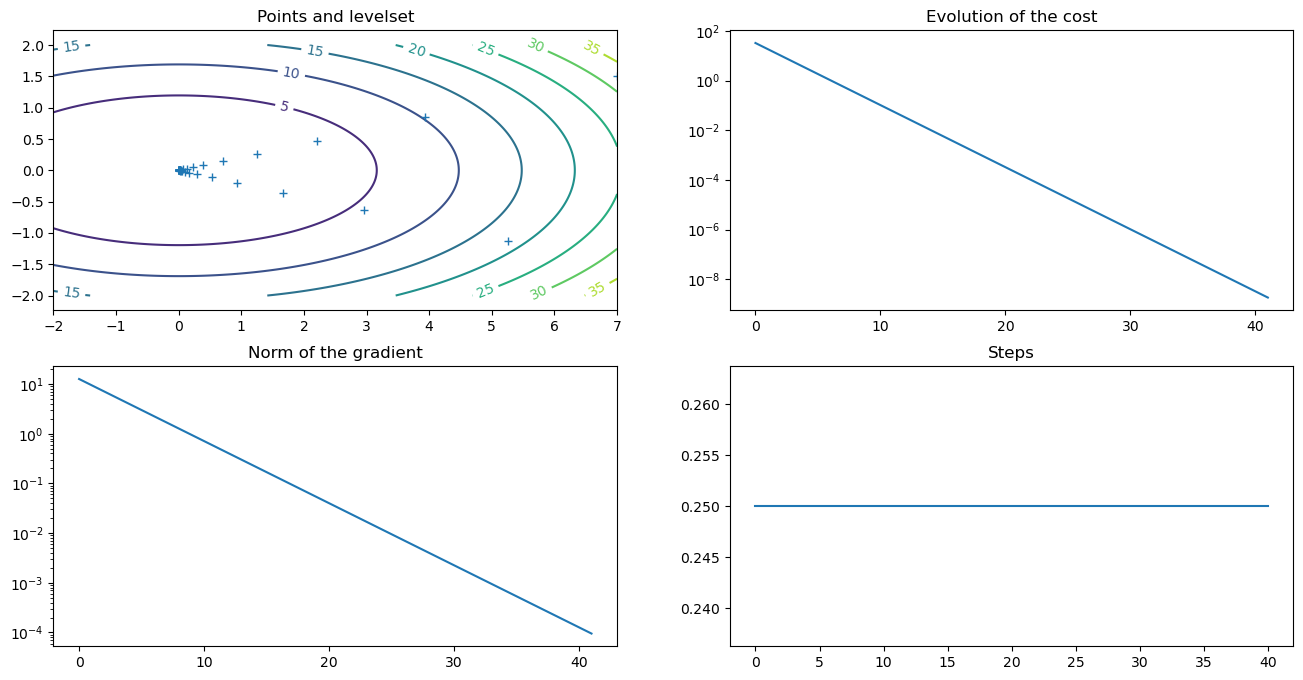

In [39]:
#square pas constant
x1=np.array([7,1.5])
f1=func.square()
res=opt.main_algorithm(f1,1,x1,ls=opt.ls_backtracking,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f1,xmax=7)

Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
iter=   0 f=4.040e+02 df=8.980e+02 comp=[   1,   1,   0]
iter=   1 f=2.978e+01 df=1.644e+02 comp=[  12,   2,   0]
iter=   2 f=1.769e+00 df=2.681e+01 comp=[  14,   3,   0]
iter=   3 f=7.668e-01 df=1.172e+01 comp=[  16,   4,   0]
iter=   4 f=5.700e-01 df=5.549e+00 comp=[  18,   5,   0]
iter=   5 f=5.249e-01 df=2.848e+00 comp=[  20,   6,   0]
iter=   6 f=5.124e-01 df=1.739e+00 comp=[  22,   7,   0]
iter=   7 f=5.073e-01 df=1.362e+00 comp=[  24,   8,   0]
iter=   8 f=5.038e-01 df=1.256e+00 comp=[  26,   9,   0]
iter=   9 f=5.008e-01 df=1.227e+00 comp=[  28,  10,   0]
iter=  10 f=4.979e-01 df=1.216e+00 comp=[  30,  11,   0]
iter=  11 f=4.950e-01 df=1.209e+00 comp=[  32,  12,   0]
iter=  12 f=4.921e-01 df=1.203e+00 comp=[  34,  13,   0]
iter=  13 f=4.893e-01 df=1.197e+00 comp=[  36,  14,   0]
iter=  14 f=4.865e-01 df=1.192e+00 comp=[  38,  15,   0]
iter=  15 f=4.838e-01 df=1.186e+00 comp=[  40,  16,   0]
iter=  16 f=4.810e-01 df=1.181e+00 comp=[  42, 

iter=9902 f=1.535e-08 df=1.107e-04 comp=[19814,9903,   0]
iter=9903 f=1.532e-08 df=1.106e-04 comp=[19816,9904,   0]
iter=9904 f=1.530e-08 df=1.106e-04 comp=[19818,9905,   0]
iter=9905 f=1.527e-08 df=1.105e-04 comp=[19820,9906,   0]
iter=9906 f=1.525e-08 df=1.104e-04 comp=[19822,9907,   0]
iter=9907 f=1.523e-08 df=1.103e-04 comp=[19824,9908,   0]
iter=9908 f=1.520e-08 df=1.102e-04 comp=[19826,9909,   0]
iter=9909 f=1.518e-08 df=1.101e-04 comp=[19828,9910,   0]
iter=9910 f=1.516e-08 df=1.100e-04 comp=[19830,9911,   0]
iter=9911 f=1.513e-08 df=1.099e-04 comp=[19832,9912,   0]
iter=9912 f=1.511e-08 df=1.099e-04 comp=[19834,9913,   0]
iter=9913 f=1.509e-08 df=1.098e-04 comp=[19836,9914,   0]
iter=9914 f=1.506e-08 df=1.097e-04 comp=[19838,9915,   0]
iter=9915 f=1.504e-08 df=1.096e-04 comp=[19840,9916,   0]
iter=9916 f=1.501e-08 df=1.095e-04 comp=[19842,9917,   0]
iter=9917 f=1.499e-08 df=1.094e-04 comp=[19844,9918,   0]
iter=9918 f=1.497e-08 df=1.094e-04 comp=[19846,9919,   0]
iter=9919 f=1.

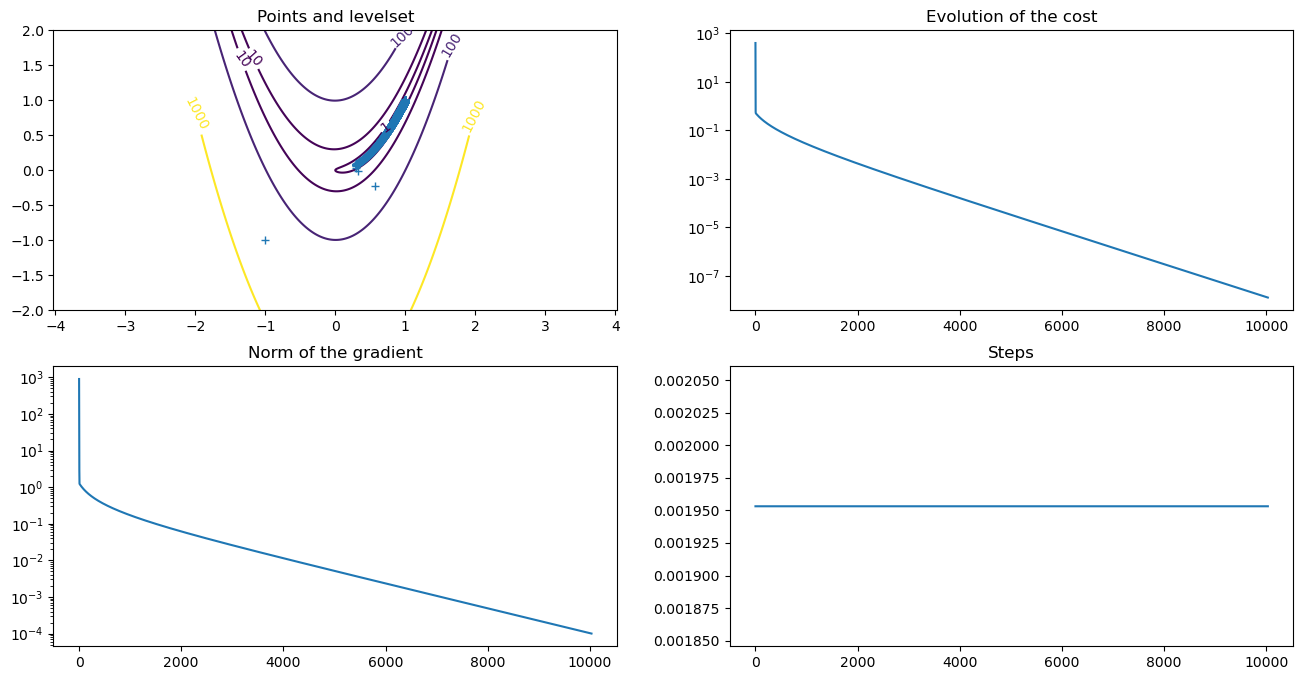

In [9]:
#Rosen ls_backtracking OK
f2=func.Rosen()
x2=np.array([-1,-1])
res=opt.main_algorithm(f2,1,x2,ls=opt.ls_backtracking,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f2,[0,1,10,100,1000])

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-3.876e-01 df=4.552e-01 comp=[   3,   2,   0]
iter=   2 f=-4.973e-01 df=7.292e-02 comp=[   5,   3,   0]
iter=   3 f=-5.000e-01 df=2.854e-03 comp=[   7,   4,   0]
iter=   4 f=-5.000e-01 df=2.679e-06 comp=[   9,   5,   0]
Success !!! Algorithm converged !!!


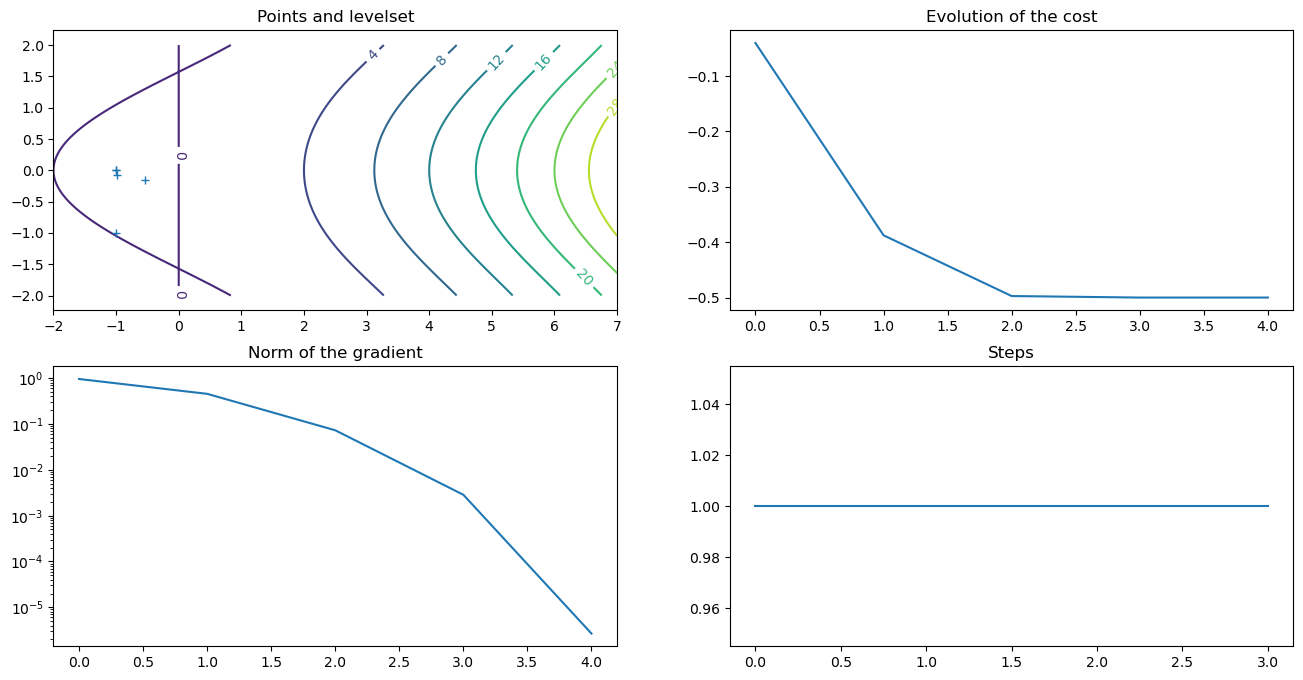

In [41]:
#oscill pac constant (1,pi) ,(-1,0)
x3=np.array([-1,-1])
f3=func.oscill()
res=opt.main_algorithm(f3,1,x3,ls=opt.ls_backtracking,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

## Partial Line search

Implémenter une fonction de recherche linéaire `ls_partial_linesearch` qui calcule le pas $s_{k+1}$ parmi 

$$\{0.1s_{k}, 0.5s_{k}, s_{k}, 2s_{k}, 10s_{k}\}$$

qui minimise $f(x_{k} + sd_{k})$.  
Tester à nouveau l’algorithme de gradient et comparer la variable `nb_computations` entre cette méthode et les précédentes.

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=1.694e+01 df=7.000e+00 comp=[  15,   2,   0]
iter=   2 f=9.727e+00 df=8.273e+00 comp=[  29,   3,   0]
iter=   3 f=4.266e+00 df=4.046e+00 comp=[  41,   4,   0]
iter=   4 f=2.417e+00 df=2.467e+00 comp=[  54,   5,   0]
iter=   5 f=1.171e+00 df=2.531e+00 comp=[  68,   6,   0]
iter=   6 f=5.869e-01 df=1.351e+00 comp=[  80,   7,   0]
iter=   7 f=3.496e-01 df=8.962e-01 comp=[  93,   8,   0]
iter=   8 f=1.508e-01 df=7.992e-01 comp=[ 107,   9,   0]
iter=   9 f=8.305e-02 df=4.691e-01 comp=[ 119,  10,   0]
iter=  10 f=4.284e-02 df=5.103e-01 comp=[ 133,  11,   0]
iter=  11 f=2.043e-02 df=2.623e-01 comp=[ 145,  12,   0]
iter=  12 f=1.196e-02 df=1.685e-01 comp=[ 158,  13,   0]
iter=  13 f=5.377e-03 df=1.589e-01 comp=[ 172,  14,   0]
iter=  14 f=2.862e-03 df=8.968e-02 comp=[ 184,  15,   0]
iter=  15 f=1.587e-03 df=1.034e-01 comp=[ 198,  16,   0]
iter=  16 f=7.150e-04 df=5.130e-02 comp=[ 210,  17,   0

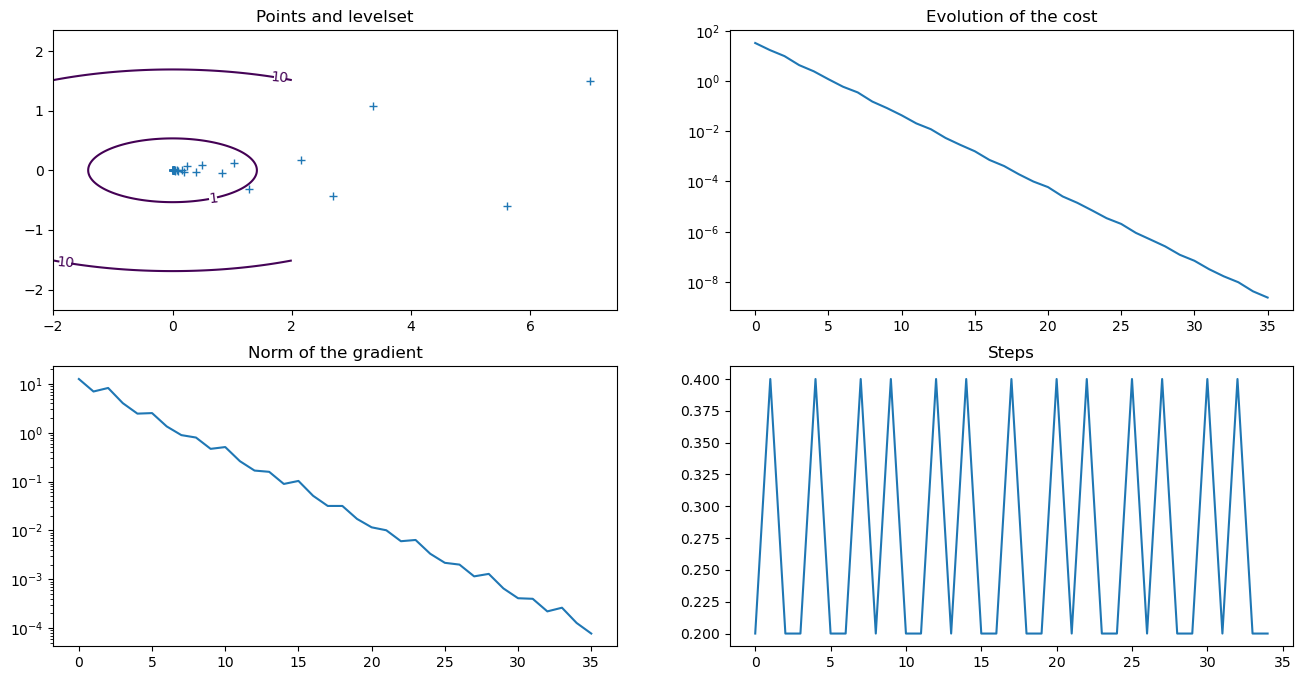

In [43]:
f=func.square()
x0=np.array([7,1.5])
res=opt.main_algorithm(f,0.1,x0,ls=opt.ls_partial_linesearch,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f,[0,1,10,100,1000])

## Algorithme de Wolfe
On rappelle les conditions de Wolfe:

$$f(x_{k} + sd_{k}) \leq f(x_{k}) + \epsilon_{1}s(\nabla f(x_{k})^{T}d_{k})$$

$$\nabla f(x_{k} + sd_{k})^{T}d_{k} \geq \epsilon_{2}(\nabla f(x_{k})^{T}d_{k})$$

avec, en pratique: $\epsilon_{1} = 10^{−4}$ et $\epsilon_{2} = 0.9$.  
Implémenter une fonction `ls_wolfe`. Cette fonction devra rendre dans la variable `info` le nombre d'itération qu'elle utilise pour converger. Tester l’algorithme de gradient avec pas de Wolfe sur les $3$ fonctions tests proposées.

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=2.055e+01 df=7.044e+00 comp=[   4,   5,   0]
iter=   2 f=1.614e+01 df=5.748e+00 comp=[   7,   9,   0]
iter=   3 f=1.303e+01 df=5.111e+00 comp=[  10,  13,   0]
iter=   4 f=1.055e+01 df=4.593e+00 comp=[  13,  17,   0]
iter=   5 f=8.543e+00 df=4.134e+00 comp=[  16,  21,   0]
iter=   6 f=6.920e+00 df=3.720e+00 comp=[  19,  25,   0]
iter=   7 f=5.605e+00 df=3.348e+00 comp=[  22,  29,   0]
iter=   8 f=4.540e+00 df=3.013e+00 comp=[  25,  33,   0]
iter=   9 f=3.677e+00 df=2.712e+00 comp=[  28,  37,   0]
iter=  10 f=2.979e+00 df=2.441e+00 comp=[  31,  41,   0]
iter=  11 f=2.413e+00 df=2.197e+00 comp=[  34,  45,   0]
iter=  12 f=1.954e+00 df=1.977e+00 comp=[  37,  49,   0]
iter=  13 f=1.583e+00 df=1.779e+00 comp=[  40,  53,   0]
iter=  14 f=1.282e+00 df=1.601e+00 comp=[  43,  57,   0]
iter=  15 f=1.039e+00 df=1.441e+00 comp=[  46,  61,   0]
iter=  16 f=8.413e-01 df=1.297e+00 comp=[  49,  65,   0

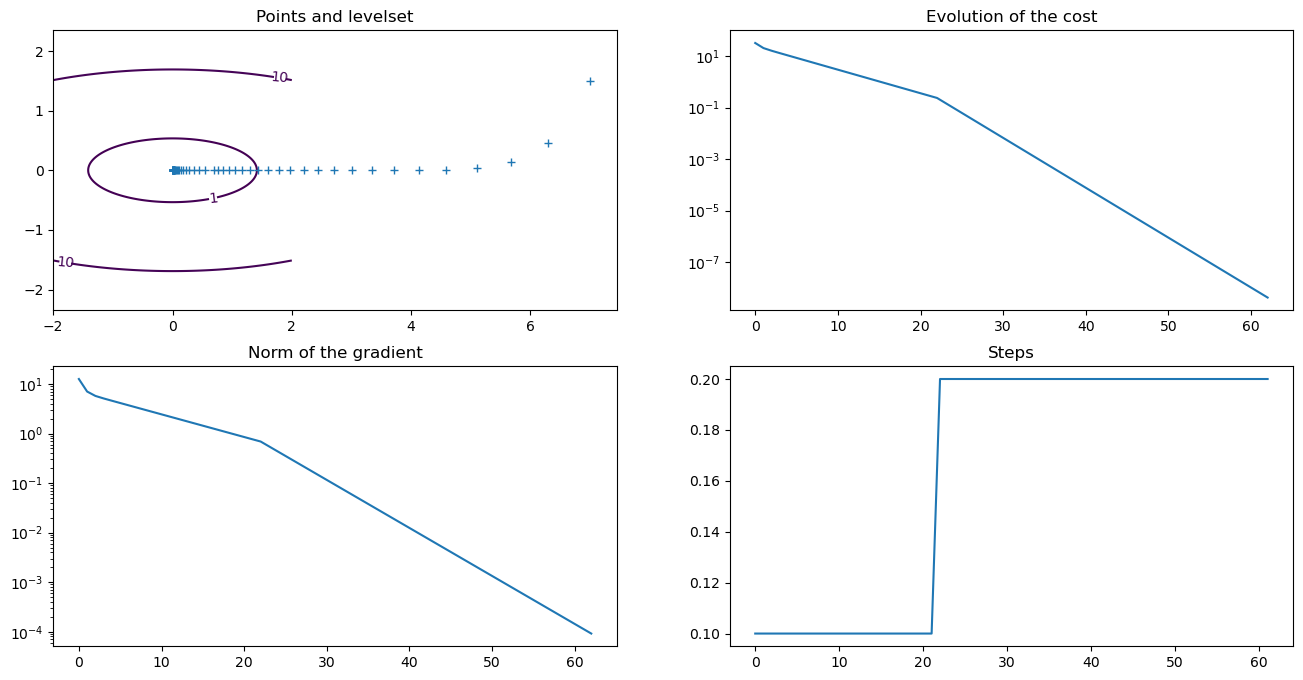

In [11]:
f=func.square()
x0=np.array([7,1.5])
res=opt.main_algorithm(f,0.1,x0,ls=opt.ls_wolfe,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f,[0,1,10,100,1000])

Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
iter=   0 f=9.040e+02 df=1.345e+03 comp=[   1,   1,   0]
iter=   1 f=7.049e+02 df=1.531e+03 comp=[  36,  21,   0]
iter=   2 f=3.680e+02 df=1.174e+03 comp=[  39,  25,   0]
iter=   3 f=1.935e+01 df=1.539e+02 comp=[  42,  29,   0]
iter=   4 f=2.160e+00 df=6.371e+01 comp=[  45,  33,   0]
iter=   5 f=1.252e+00 df=4.411e+01 comp=[  48,  37,   0]
iter=   6 f=4.272e-01 df=2.724e+01 comp=[  51,  41,   0]
iter=   7 f=2.163e-01 df=1.841e+01 comp=[  54,  45,   0]
iter=   8 f=9.102e-02 df=1.185e+01 comp=[  57,  49,   0]
iter=   9 f=4.732e-02 df=7.901e+00 comp=[  60,  53,   0]
iter=  10 f=2.556e-02 df=5.158e+00 comp=[  63,  57,   0]
iter=  11 f=1.695e-02 df=3.420e+00 comp=[  66,  61,   0]
iter=  12 f=1.297e-02 df=2.247e+00 comp=[  69,  65,   0]
iter=  13 f=1.130e-02 df=1.488e+00 comp=[  72,  69,   0]
iter=  14 f=1.054e-02 df=9.828e-01 comp=[  75,  73,   0]
iter=  15 f=1.021e-02 df=6.536e-01 comp=[  78,  77,   0]
iter=  16 f=1.005e-02 df=4.374e-01 comp=[  81, 

iter=5263 f=9.389e-07 df=9.495e-04 comp=[17742,22989,   0]
iter=5264 f=9.374e-07 df=9.416e-04 comp=[17745,22993,   0]
iter=5265 f=9.359e-07 df=9.343e-04 comp=[17748,22997,   0]
iter=5266 f=9.345e-07 df=9.276e-04 comp=[17751,23001,   0]
iter=5267 f=9.330e-07 df=9.214e-04 comp=[17754,23005,   0]
iter=5268 f=9.315e-07 df=9.156e-04 comp=[17757,23009,   0]
iter=5269 f=9.301e-07 df=9.103e-04 comp=[17760,23013,   0]
iter=5270 f=9.286e-07 df=9.054e-04 comp=[17763,23017,   0]
iter=5271 f=9.272e-07 df=9.009e-04 comp=[17766,23021,   0]
iter=5272 f=9.257e-07 df=8.967e-04 comp=[17769,23025,   0]
iter=5273 f=9.243e-07 df=8.928e-04 comp=[17772,23029,   0]
iter=5274 f=9.228e-07 df=8.892e-04 comp=[17775,23033,   0]
iter=5275 f=9.214e-07 df=8.859e-04 comp=[17778,23037,   0]
iter=5276 f=9.199e-07 df=8.827e-04 comp=[17781,23041,   0]
iter=5277 f=9.185e-07 df=8.798e-04 comp=[17784,23045,   0]
iter=5278 f=9.171e-07 df=8.771e-04 comp=[17787,23049,   0]
iter=5279 f=9.143e-07 df=1.017e-03 comp=[17794,23059,   

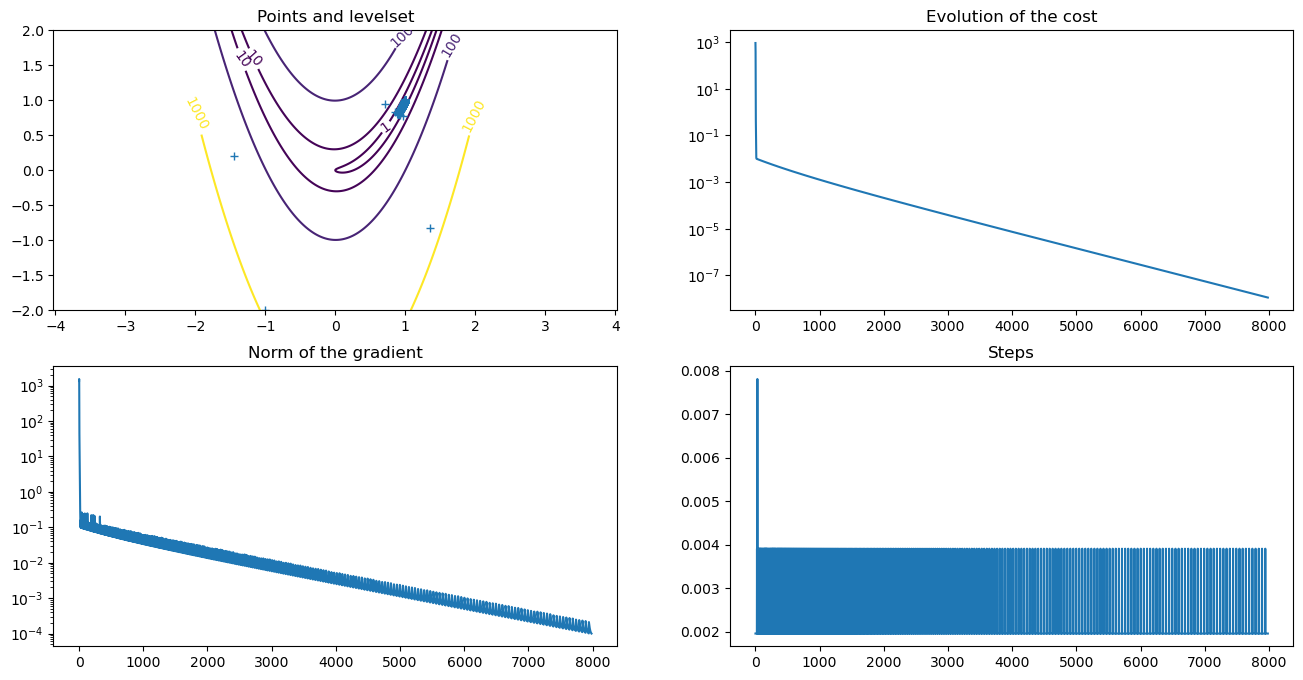

In [62]:
#tres lente avec l'algo de descente de gradient
f2=func.Rosen()
x2=np.array([-1,-2])
res=opt.main_algorithm(f2,0.5,x2,ls=opt.ls_wolfe,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f2,[0,1,10,100,1000])

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-1.260e-01 df=8.315e-01 comp=[   4,   5,   0]
iter=   2 f=-1.909e-01 df=7.298e-01 comp=[   7,   9,   0]
iter=   3 f=-2.411e-01 df=6.485e-01 comp=[  10,  13,   0]
iter=   4 f=-2.809e-01 df=5.830e-01 comp=[  13,  17,   0]
iter=   5 f=-3.425e-01 df=4.789e-01 comp=[  20,  27,   0]
iter=   6 f=-3.848e-01 df=4.073e-01 comp=[  23,  31,   0]
iter=   7 f=-4.157e-01 df=3.520e-01 comp=[  26,  35,   0]
iter=   8 f=-4.388e-01 df=3.051e-01 comp=[  29,  39,   0]
iter=   9 f=-4.562e-01 df=2.633e-01 comp=[  32,  43,   0]
iter=  10 f=-4.691e-01 df=2.254e-01 comp=[  35,  47,   0]
iter=  11 f=-4.785e-01 df=1.913e-01 comp=[  38,  51,   0]
iter=  12 f=-4.852e-01 df=1.609e-01 comp=[  41,  55,   0]
iter=  13 f=-4.900e-01 df=1.342e-01 comp=[  44,  59,   0]
iter=  14 f=-4.932e-01 df=1.112e-01 comp=[  47,  63,   0]
iter=  15 f=-4.955e-01 df=9.151e-02 comp=[  50,  67,   0]
iter=  16 f=-4.970e-01 df=7.493e-02 

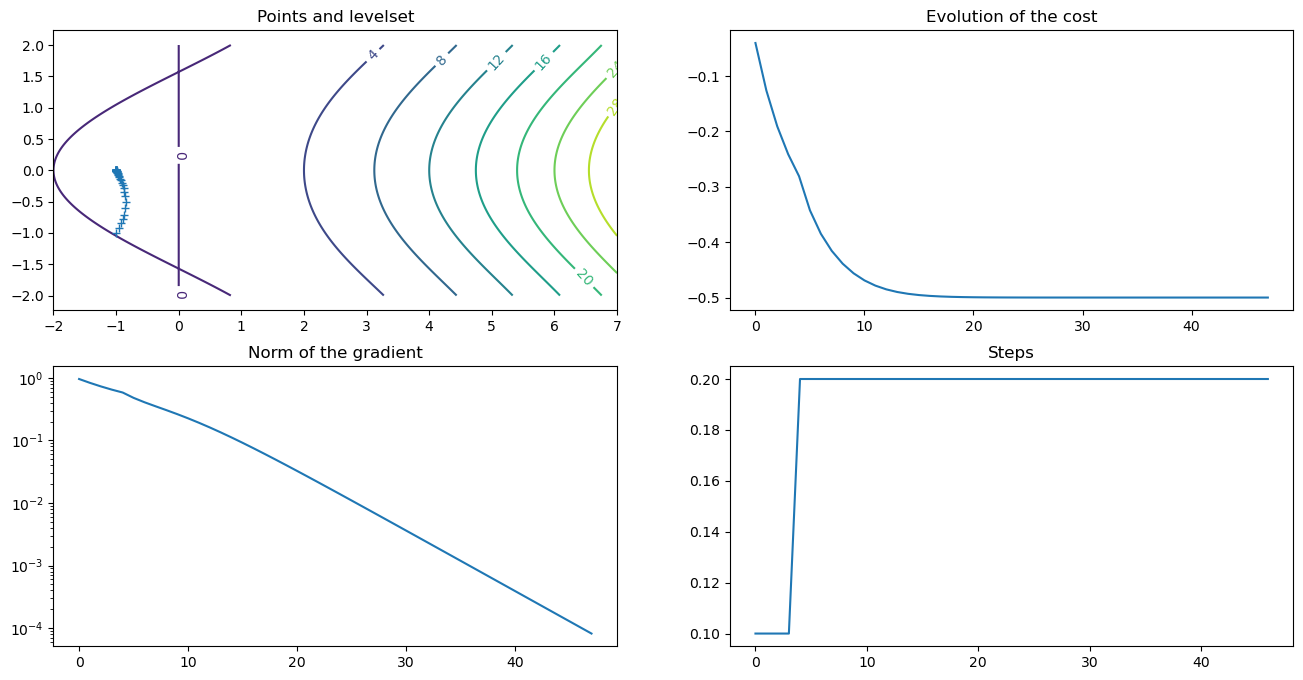

In [63]:
x3=np.array([-1,-1])
f3=func.oscill()
res=opt.main_algorithm(f3,0.1,x3,ls=opt.ls_wolfe,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

## Algorithme de Newton
Dans cette deuxième partie, nous allons implémenter les algorithmes de Newton. Il s'agit de prendre comme direction de descente $d_k$ solution de 
$$d_k=Hf(x_{k})^{−1}\nabla f(x_{k})$$
Attention ce choix de $d_k$ ne donne pas toujours une direction de descente. On va donc calculer l'angle entre $d_k$ et $\nabla f(x_{k})$, i.e, on calcule

$$\cos(\theta_k)=\frac{\langle d_k,-\nabla f(x_k)\rangle }{\Vert d_k \Vert \Vert \nabla f(x_k)\Vert}$$

Si $\cos(\theta_k)>0.1$ alors l'algorithme de Newton rend $d_k$ sinon il se transforme en algorithme de gradient et rend $-\nabla f(x_k)$.
Essayez la méthode de Newton avec pas constant. De préférence avec un pas de $1$.



Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=2.072e+01 df=1.010e+01 comp=[   8,  11,   1]
iter=   2 f=1.326e+01 df=8.076e+00 comp=[  11,  15,   2]
iter=   3 f=8.487e+00 df=6.461e+00 comp=[  14,  19,   3]
iter=   4 f=5.432e+00 df=5.169e+00 comp=[  17,  23,   4]
iter=   5 f=3.476e+00 df=4.135e+00 comp=[  20,  27,   5]
iter=   6 f=2.225e+00 df=3.308e+00 comp=[  23,  31,   6]
iter=   7 f=1.424e+00 df=2.646e+00 comp=[  26,  35,   7]
iter=   8 f=9.113e-01 df=2.117e+00 comp=[  29,  39,   8]
iter=   9 f=5.832e-01 df=1.694e+00 comp=[  32,  43,   9]
iter=  10 f=3.733e-01 df=1.355e+00 comp=[  35,  47,  10]
iter=  11 f=2.389e-01 df=1.084e+00 comp=[  38,  51,  11]
iter=  12 f=1.529e-01 df=8.672e-01 comp=[  41,  55,  12]
iter=  13 f=9.785e-02 df=6.938e-01 comp=[  44,  59,  13]
iter=  14 f=6.262e-02 df=5.550e-01 comp=[  47,  63,  14]
iter=  15 f=4.008e-02 df=4.440e-01 comp=[  50,  67,  15]
iter=  16 f=2.565e-02 df=3.552e-01 comp=[  53,  71,  16

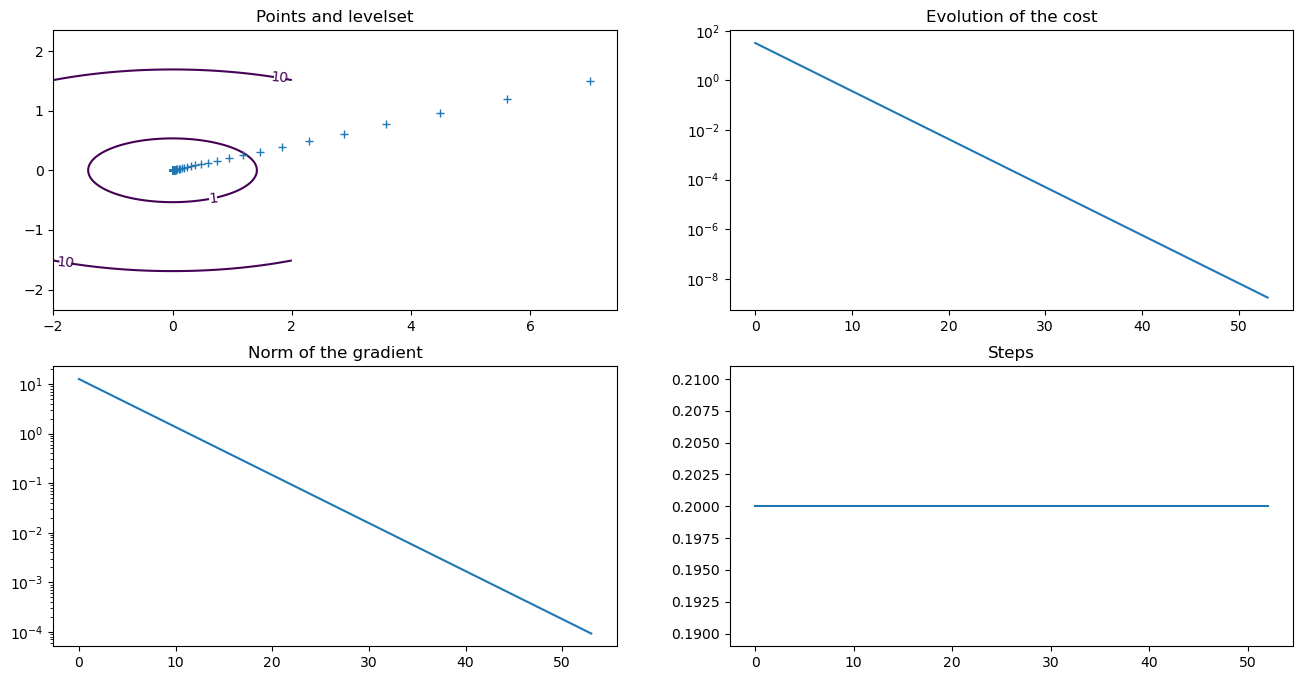

In [12]:
f=func.square()
x0=np.array([7,1.5])
res=opt.main_algorithm(f,0.1,x0,ls=opt.ls_wolfe,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f,[0,1,10,100,1000])

Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
iter=   0 f=9.040e+02 df=1.345e+03 comp=[   1,   1,   0]
iter=   1 f=2.290e+02 df=6.735e+02 comp=[   4,   5,   1]
iter=   2 f=6.023e+01 df=3.376e+02 comp=[   7,   9,   2]
iter=   3 f=1.802e+01 df=1.697e+02 comp=[  10,  13,   3]
iter=   4 f=7.425e+00 df=8.582e+01 comp=[  13,  17,   4]
iter=   5 f=4.694e+00 df=4.406e+01 comp=[  16,  21,   5]
iter=   6 f=3.859e+00 df=2.386e+01 comp=[  19,  25,   6]
iter=   7 f=3.395e+00 df=1.558e+01 comp=[  22,  29,   7]
iter=   8 f=2.960e+00 df=1.345e+01 comp=[  25,  33,   8]
iter=   9 f=2.566e+00 df=1.150e+01 comp=[  28,  37,   9]
iter=  10 f=2.209e+00 df=9.774e+00 comp=[  31,  41,  10]
iter=  11 f=1.888e+00 df=8.254e+00 comp=[  34,  45,  11]
iter=  12 f=1.601e+00 df=6.944e+00 comp=[  37,  49,  12]
iter=  13 f=1.346e+00 df=5.847e+00 comp=[  40,  53,  13]
iter=  14 f=1.121e+00 df=4.961e+00 comp=[  43,  57,  14]
iter=  15 f=9.232e-01 df=4.281e+00 comp=[  46,  61,  15]
iter=  16 f=7.514e-01 df=3.793e+00 comp=[  49, 

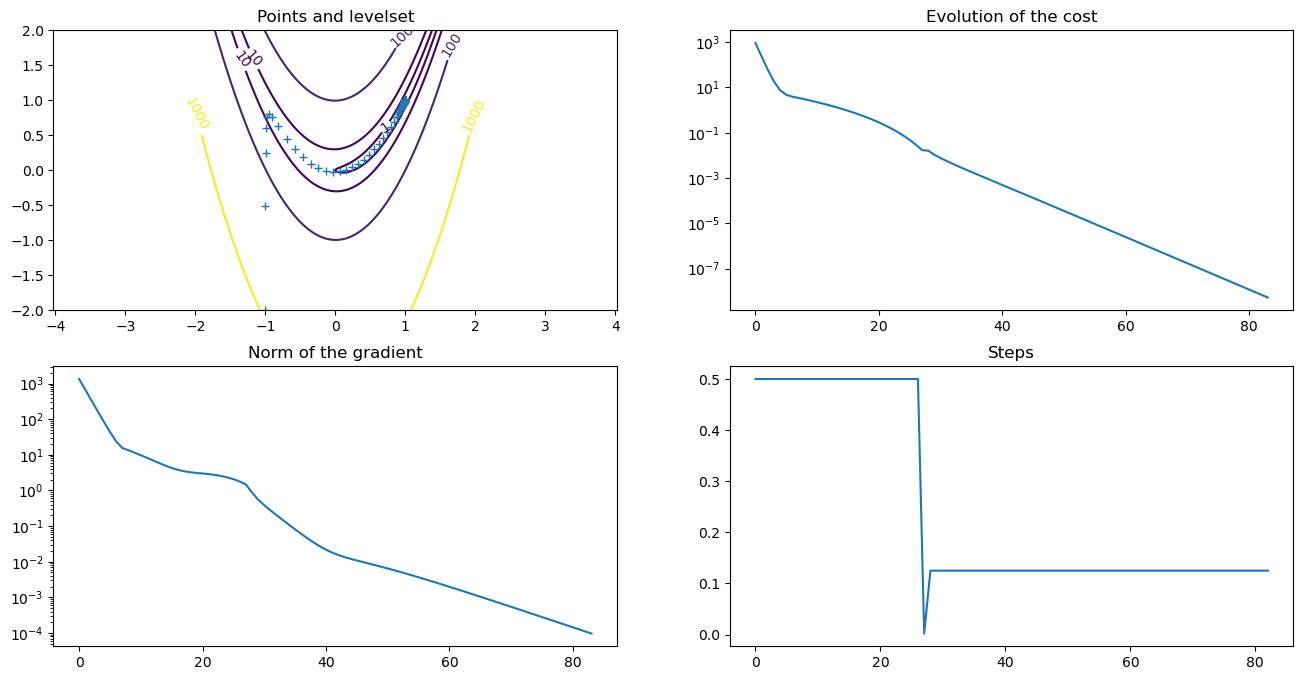

In [55]:
f2=func.Rosen()
x2=np.array([-1,-2])
res=opt.main_algorithm(f2,0.5,x2,ls=opt.ls_wolfe,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f2,[0,1,10,100,1000])

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-1.260e-01 df=8.315e-01 comp=[   4,   5,   1]
iter=   2 f=-1.909e-01 df=7.298e-01 comp=[   7,   9,   2]
iter=   3 f=-3.636e-01 df=5.223e-01 comp=[  10,  13,   3]
iter=   4 f=-4.127e-01 df=4.178e-01 comp=[  17,  23,   4]
iter=   5 f=-4.441e-01 df=3.343e-01 comp=[  20,  27,   5]
iter=   6 f=-4.642e-01 df=2.674e-01 comp=[  23,  31,   6]
iter=   7 f=-4.771e-01 df=2.139e-01 comp=[  26,  35,   7]
iter=   8 f=-4.854e-01 df=1.711e-01 comp=[  29,  39,   8]
iter=   9 f=-4.906e-01 df=1.369e-01 comp=[  32,  43,   9]
iter=  10 f=-4.940e-01 df=1.095e-01 comp=[  35,  47,  10]
iter=  11 f=-4.962e-01 df=8.763e-02 comp=[  38,  51,  11]
iter=  12 f=-4.975e-01 df=7.010e-02 comp=[  41,  55,  12]
iter=  13 f=-4.984e-01 df=5.608e-02 comp=[  44,  59,  13]
iter=  14 f=-4.990e-01 df=4.487e-02 comp=[  47,  63,  14]
iter=  15 f=-4.994e-01 df=3.589e-02 comp=[  50,  67,  15]
iter=  16 f=-4.996e-01 df=2.871e-02 

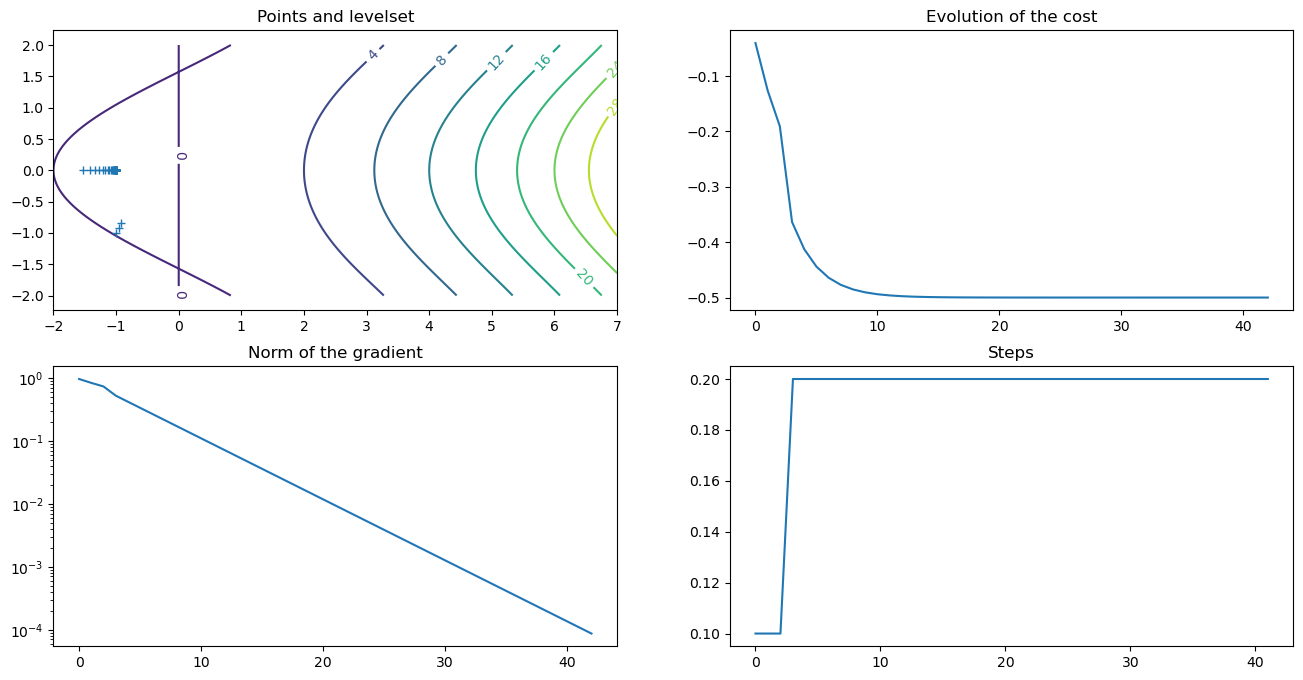

In [61]:
#oscill pac constant (1,pi) ,(-1,0)
x3=np.array([-1,-1])
f3=func.oscill()
res=opt.main_algorithm(f3,0.1,x3,ls=opt.ls_wolfe,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

In [ ]:
#Algo de newton plus rapide mais plus couteux (nb_computations très important par rapport à l'algo de gradient de descente )

Tester la méthode de Newton avec pas de Wolfe sur les 3 fonctions et comparer les résultats obtenus avec ceux des algos de gradient avec pas de Wolfe et l’algorithme de Newton classique. On essaiera aussi une nouvelle fonction linesearch qui met comme premier pas de Wolfe le pas 1. Elle est définie de la manière suivante

`def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)`

Fonction (x,y) --> x^2/2+7/2*y^2
iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=0.000e+00 df=0.000e+00 comp=[   4,   5,   1]
Success !!! Algorithm converged !!!


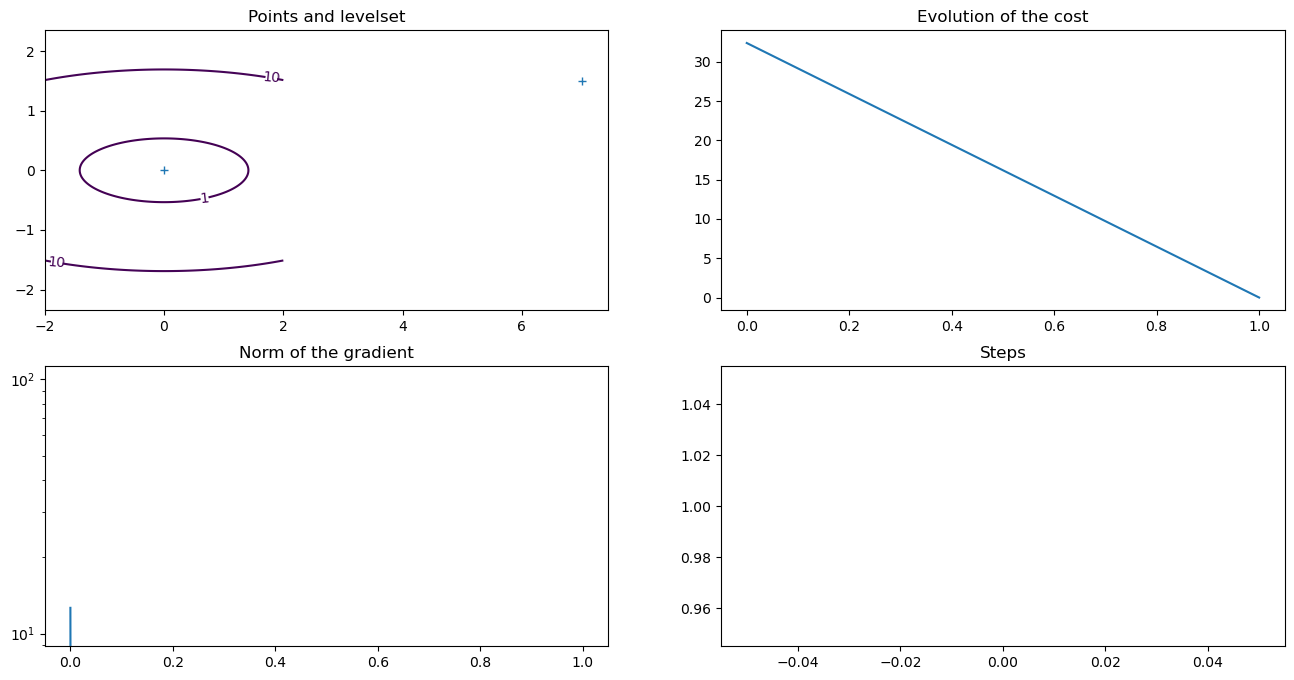

In [14]:
f=func.square()
x0=np.array([7,1.5])
res=opt.main_algorithm(f,0.1,x0,ls=opt.ls_wolfe_step_is_one,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f,[0,1,10,100,1000])

Fonction (x,y) --> 100*(y-x^2)^2+(1-x)^2
iter=   0 f=9.040e+02 df=1.345e+03 comp=[   1,   1,   0]
iter=   1 f=3.987e+00 df=3.998e+00 comp=[   4,   5,   1]
iter=   2 f=3.439e+00 df=2.530e+01 comp=[  19,  15,   2]
iter=   3 f=2.644e+00 df=8.172e+00 comp=[  22,  19,   3]
iter=   4 f=2.234e+00 df=1.325e+01 comp=[  29,  25,   4]
iter=   5 f=1.696e+00 df=6.905e+00 comp=[  32,  29,   5]
iter=   6 f=1.384e+00 df=1.098e+01 comp=[  35,  33,   6]
iter=   7 f=9.310e-01 df=2.454e+00 comp=[  38,  37,   7]
iter=   8 f=7.437e-01 df=7.465e+00 comp=[  45,  43,   8]
iter=   9 f=4.803e-01 df=1.798e+00 comp=[  48,  47,   9]
iter=  10 f=3.567e-01 df=4.578e+00 comp=[  55,  53,  10]
iter=  11 f=2.191e-01 df=3.251e+00 comp=[  58,  57,  11]
iter=  12 f=1.299e-01 df=4.752e+00 comp=[  61,  61,  12]
iter=  13 f=6.436e-02 df=1.848e+00 comp=[  64,  65,  13]
iter=  14 f=3.314e-02 df=4.597e+00 comp=[  67,  69,  14]
iter=  15 f=2.396e-02 df=2.537e+00 comp=[ 106,  91,  15]
iter=  16 f=2.105e-02 df=1.387e+00 comp=[ 145, 

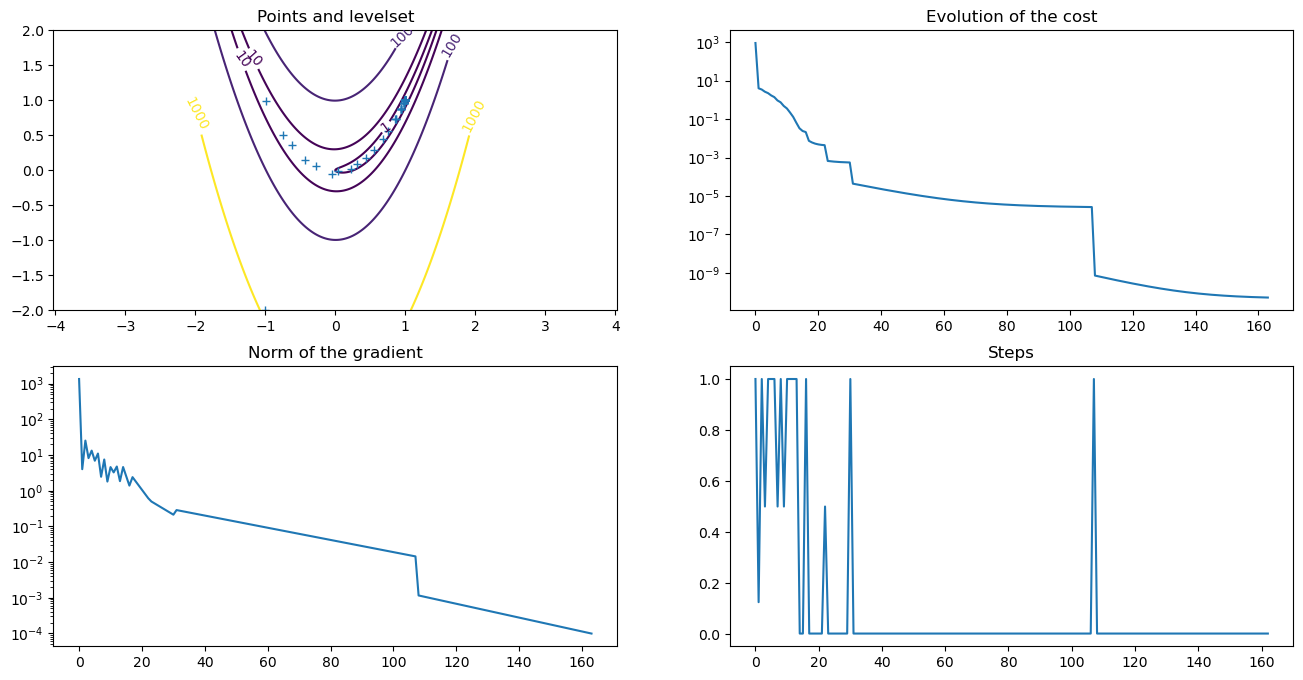

In [60]:
f2=func.Rosen()
x2=np.array([-1,-2])
res=opt.main_algorithm(f2,0.5,x2,ls=opt.ls_wolfe_step_is_one,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f2,[0,1,10,100,1000])

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-3.876e-01 df=4.552e-01 comp=[   4,   5,   0]
iter=   2 f=-4.973e-01 df=7.292e-02 comp=[   7,   9,   0]
iter=   3 f=-5.000e-01 df=2.854e-03 comp=[  10,  13,   0]
iter=   4 f=-5.000e-01 df=2.679e-06 comp=[  13,  17,   0]
Success !!! Algorithm converged !!!


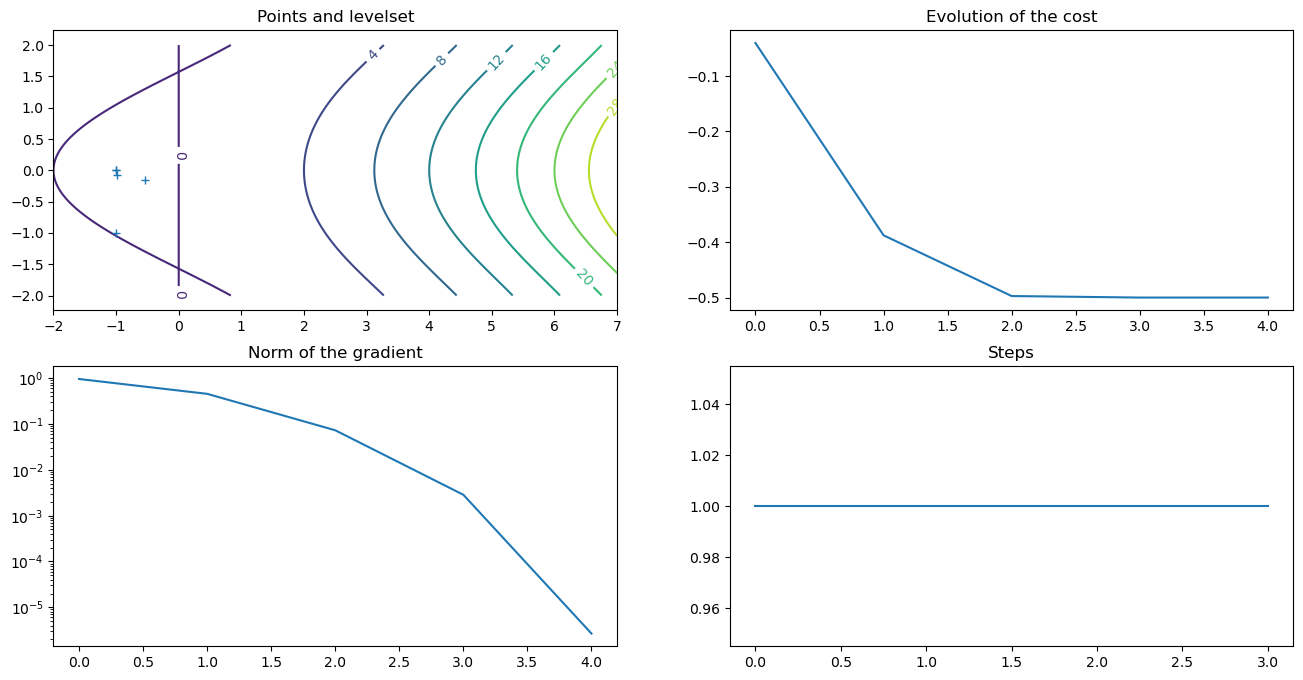

In [59]:
#oscill pac constant (1,pi) ,(-1,0)
x3=np.array([-1,-1])
f3=func.oscill()
res=opt.main_algorithm(f3,0.1,x3,ls=opt.ls_wolfe_step_is_one,dc=opt.dc_gradient,verbose=True)
contour_and_f_plot(res,f3,xmax=7,ymax=2)

### Recherche linéaire de Wolfe par interpolation cubique.

On pose: $\varphi_{k}(x) = f(x_{k} + xd_{k})$. Rappelons que: $\varphi'_{k}(x) = \nabla f(x_{k} + xd_{k})^{T}d_{k}$.

**(a)** Soit $s > 0$ fixé. Calculer (**à la main !**) le polynôme de degré $3: p_{s}(x) = a + bx +
cx^{2} + dx^{3}$ qui approxime $\varphi_{k}$ sur $[0, s]$ de sorte que:

$$p_{s}(0) = \varphi_{k}(0), \quad p_{s}(s) = \varphi_{k}(s), \quad p_{s}'(0) = \varphi_{k}'(0), \quad p_{s}'(s) = \varphi_{k}'(s).$$

**(b)** Montrer que le minimum de $p_{s}$ est atteint en un $x_{s}$ tel que: $b + 2cx_{s} + 3dx^{2}_{s} = 0$.

**(c)** Implémenter une fonction *ls_wolfe_cubique* permettant de calculer un pas $s > 0$ vérifiant les conditions de Wolfe selon l’algorithme suivant:

Initialisation: $s = 1$ (pas de Newton);  
Tant que les conditions de Wolfe ne sont pas vérifiées par le pas courant $s$, faire :

i-) Calculer le point $x_{s}$ qui réalise le minimum de $p_s$ sur $[0, s]$.  
ii-) S’il existe, $s \leftarrow x_{s}$; sinon $s \leftarrow s/2$.

Tester la méthode de Newton avec pas de Wolfe cubique sur les fonctions $f_{i}$, $i = 1, 2, 3$ et comparer les résultats obtenus avec ceux de l’algorithme de Newton avec pas de Wolfe (non cubique)

Fonction (x,y) --> 1/2*x^2+x*cos(y)
iter=   0 f=6.121e+00 df=4.348e+00 comp=[   1,   1,   0]
iter=   1 f=6.472e-01 df=1.482e+00 comp=[   4,   5,   1]
iter=   2 f=-3.433e-01 df=5.205e-01 comp=[   7,   9,   2]
iter=   3 f=-4.840e-01 df=1.743e-01 comp=[  10,  13,   3]
iter=   4 f=-4.999e-01 df=1.236e-02 comp=[  13,  17,   4]
iter=   5 f=-5.000e-01 df=8.032e-05 comp=[  16,  21,   5]
Success !!! Algorithm converged !!!


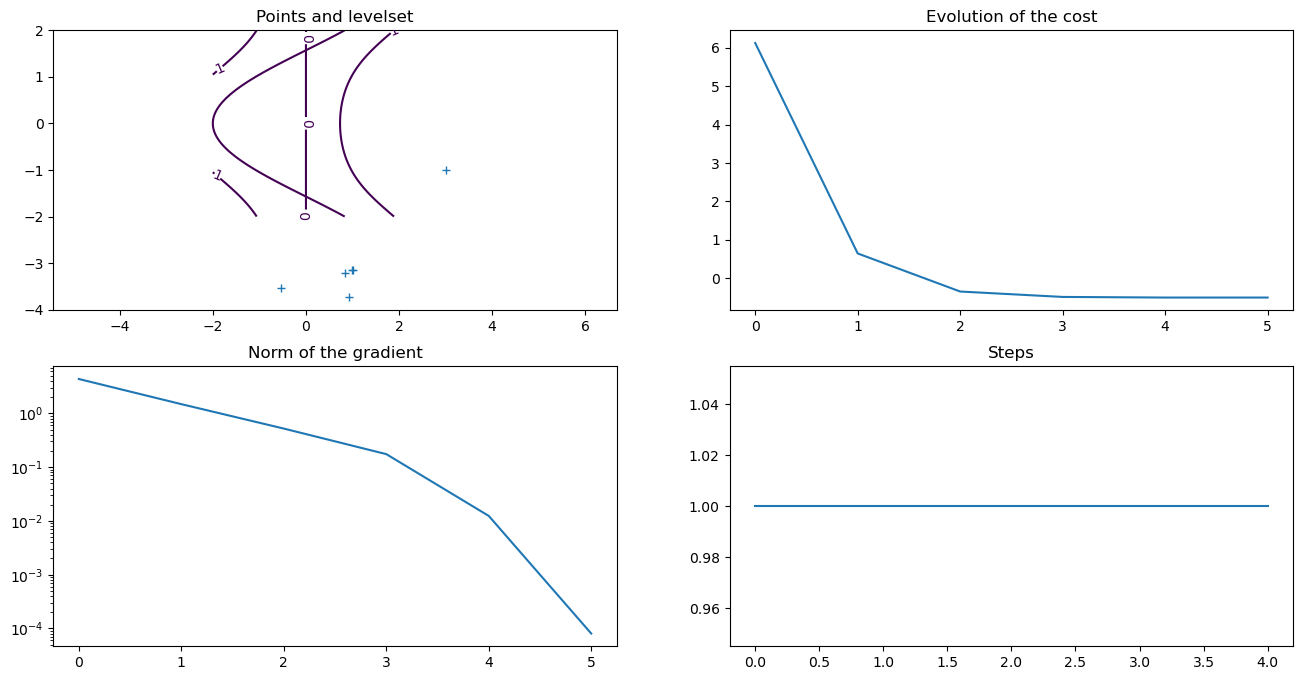

In [29]:
f=func.oscill()
x0=np.array([3,-1])
res=opt.main_algorithm(f,1,x0,ls=opt.ls_wolfe_cubique,dc=opt.dc_newton,verbose=True)
contour_and_f_plot(res,f,[0,1,10,100,1000])